<a href="https://colab.research.google.com/github/AmiAnurag/Time-Series-Analysis/blob/anurag/time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

**LOADING THE DATA**

In [32]:
#raw data
#please  replace the location provided inside read_csv with the location of google drive where your dataset is saved
eurjpy_d=pd.read_csv("EURJPY.csv")
eurusd_d=pd.read_csv("EURUSD.csv")
usdjpy_d=pd.read_csv("USDJPY.csv")

In [33]:
ej=eurjpy_d.iloc[:,[0,4]]
eu=eurusd_d.iloc[:,[0,4]]
uj=usdjpy_d.iloc[:,[0,4]]

In [34]:
# print(ej.head())
# print(eu.head())
# uj.head()
# eu.isnull().sum()
# NO NULL DATA

In [35]:
#convert date to pandas datetime
ej['Date']=pd.to_datetime(ej['Date'])
uj['Date']=pd.to_datetime(uj['Date'])
eu['Date']=pd.to_datetime(eu['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [36]:
eu.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [37]:
ej.set_index('Date',inplace=True)
eu.set_index('Date',inplace=True)
uj.set_index('Date',inplace=True)

**NORMALIZE THE DATA**

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
ej['Close']=scaling.fit_transform(ej[['Close']])
eu['Close']=scaling.fit_transform(eu[['Close']])
uj['Close']=scaling.fit_transform(uj[['Close']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [39]:
ej.head()

,Close
Date,
2021-07-09 00:00:00,0.198877
2021-07-08 23:45:00,0.176416
2021-07-08 23:30:00,0.193262
2021-07-08 23:15:00,0.162377
2021-07-08 23:00:00,0.164249


**VISUALIZING THE DATA**

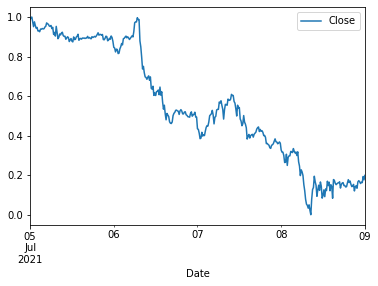

In [40]:
ej.plot()

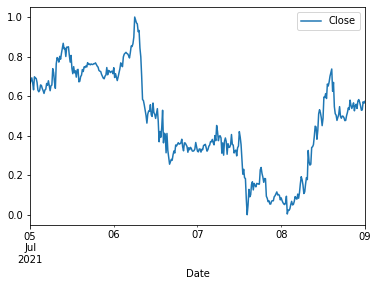

In [41]:
eu.plot()

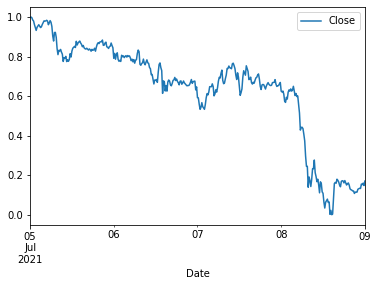

In [42]:
uj.plot()

***Stationarity and Seasonality***
As observed from the plottings we can conclude that there is no seasonality in data , neither is it stationary. But a clear evidence of presence of some trend is observable

In [43]:
#Checking the stationarity
from statsmodels.tsa.stattools import adfuller
test_result_ej=adfuller(ej['Close'])
test_result_eu=adfuller(eu['Close'])
test_result_uj=adfuller(uj['Close'])

In [44]:
#Null hypothesis: It is non stationary
#Alternate Hypothesis: It is stationary

def adfuller_test(col_name):
    result=adfuller(col_name)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [45]:
adfuller_test(ej['Close'])

ADF Test Statistic : -0.7314123399853077
p-value : 0.8384444137362497
#Lags Used : 3
Number of Observations Used : 381
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [46]:
adfuller_test(eu['Close'])

ADF Test Statistic : -1.4701595167427883
p-value : 0.5482179898440813
#Lags Used : 5
Number of Observations Used : 379
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [47]:
adfuller_test(uj['Close'])

ADF Test Statistic : -1.2426176014329002
p-value : 0.6549994301814431
#Lags Used : 0
Number of Observations Used : 384
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


''' Hence the intution from the plotting was true that the
datasets are non stationary as we have prooved it using dicky fuller test.'''

**Finding autocorrelation across the close column of the data set. This will help in deciding the p,d,q of ARIMA model.**





/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


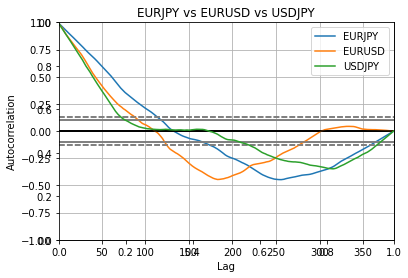

In [48]:
from pandas.plotting import autocorrelation_plot
plt.title("EURJPY vs EURUSD vs USDJPY")

autocorrelation_plot(ej['Close'],label="EURJPY")

autocorrelation_plot(eu['Close'],label="EURUSD")

autocorrelation_plot(uj['Close'],label="USDJPY")

plt.show()

In [49]:
from scipy.stats import spearmanr

In [50]:
#coorelation across the datasets
dt={1:"EURJPY",2:"EURUSD",3:"USDJPY"}
c=0
for dataset in [eurjpy_d,eurusd_d,usdjpy_d]:
  c=c+1
  print("CORRELATION CHART FOR ",dt[c])
  for col in dataset.columns[1:]:
    print(f"Correlation of Close with {col}  is ",spearmanr(dataset['Close'],dataset[col])[0])
  print()


CORRELATION CHART FOR  EURJPY
Correlation of Close with Open  is  0.9892539623420482
Correlation of Close with High  is  0.9932722780681692
Correlation of Close with Low  is  0.9956607434309283
Correlation of Close with Close  is  0.9999999999999999
Correlation of Close with Change(Pips)  is  0.0723745477846503
Correlation of Close with Change(%)  is  0.08153411949247655

CORRELATION CHART FOR  EURUSD
Correlation of Close with Open  is  0.9829689950555589
Correlation of Close with High  is  0.992025477676432
Correlation of Close with Low  is  0.9918068806798407
Correlation of Close with Close  is  1.0
Correlation of Close with Change(Pips)  is  0.06847579664051377
Correlation of Close with Change(%)  is  0.07027822995170169

CORRELATION CHART FOR  USDJPY
Correlation of Close with Open  is  0.9840743861918704
Correlation of Close with High  is  0.992286410197823
Correlation of Close with Low  is  0.993706123751919
Correlation of Close with Close  is  1.0
Correlation of Close with Change

As observed there is a strong positive correlation among the open , high , low and close column of the datasets

**Thoughts on Autocorrelation and Partial Autocorrelation**

Identification of an AR model is often best done with the PACF.

For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.


.


p---> related to AR model

d---> related to differencing

q---> related to MA model

In [51]:
# creating the difference column in refrence to close column of the datasets
ej['Close_Diff']=ej['Close']-ej['Close'].shift(1)
eu['Close_Diff']=eu['Close']-eu['Close'].shift(1)
uj['Close_Diff']=uj['Close']-uj['Close'].shift(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

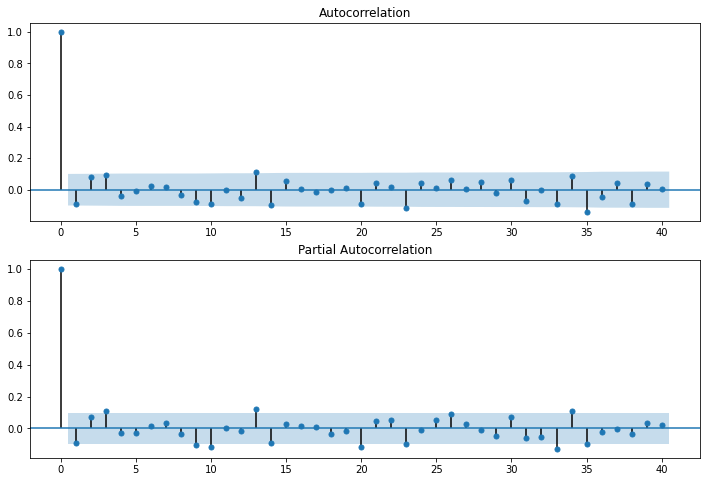

In [52]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ej['Close_Diff'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ej['Close_Diff'].iloc[1:],lags=40,ax=ax2)

In [53]:
#FOR EURJPY DATASET
# From the pacf graph we can conclude the graph shuts off nearly at 1 [p=1]
# the acf graph tappers towards zero before 1. [q=0]
# The differencing has been done only one time so d=1.


*Same procedure goes for the other USDJPY & EURUSD DATASET  also*

**Analyzing the peaks and valleys of EURJPY,EURUSD,USDJPY historical datasets**

In [54]:
ej['Close_Reciprocal']=np.reciprocal(ej['Close'])
eu['Close_Reciprocal']=np.reciprocal(eu['Close'])
uj['Close_Reciprocal']=np.reciprocal(uj['Close'])


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: Set

In [55]:
# finding the peaks
from scipy.signal import find_peaks

#Storing the peaks and valleys of EURJPY dataset
peaks_ej,_=find_peaks(ej.Close)
valleys_ej,_=find_peaks(ej.Close_Reciprocal)

#Storing the peaks and valleys of EURUSD dataset
peaks_eu,_=find_peaks(eu.Close)
valleys_eu,_=find_peaks(eu.Close_Reciprocal)

#Storing the peaks and valleys of USDJPY dataset
peaks_uj,_=find_peaks(uj.Close)
valleys_uj,_=find_peaks(uj.Close_Reciprocal)

In [56]:
ej.Close[2]

0.19326158165652885

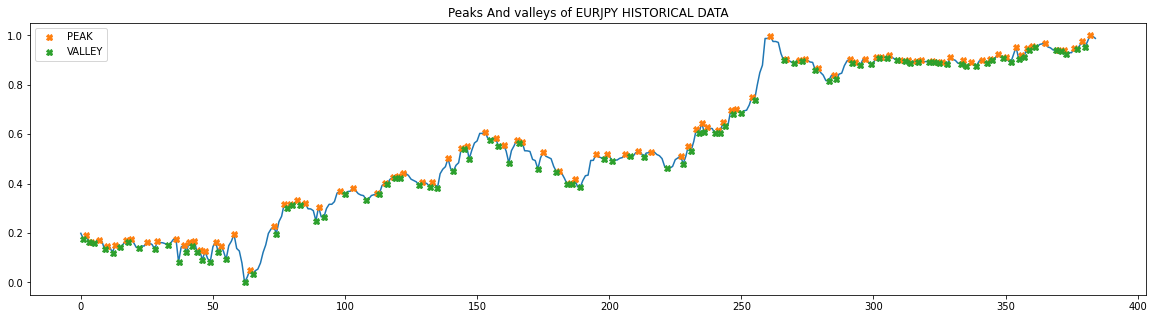

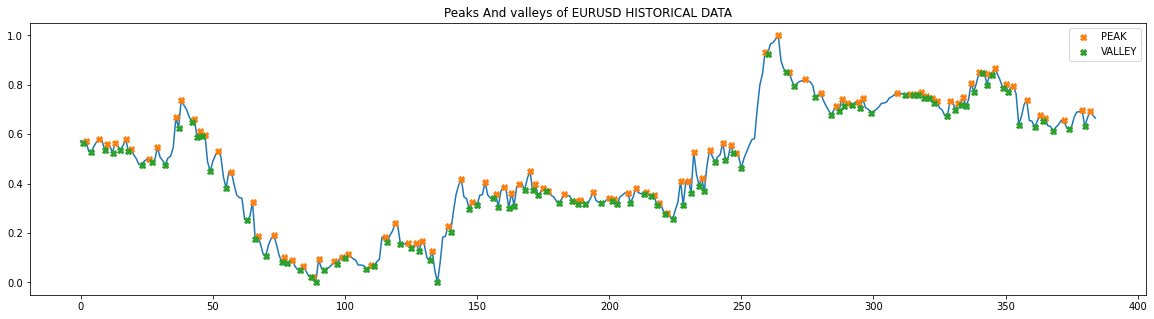

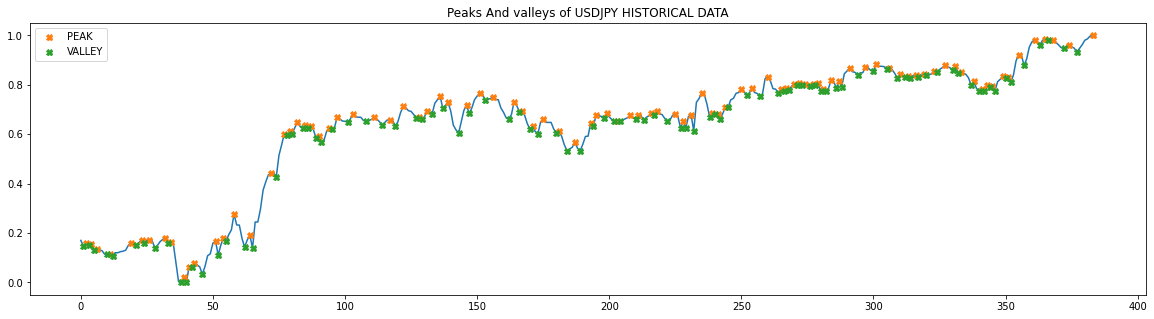

In [57]:
#Plotting the peaks and valleys od respective datasets

#for eurjpy
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.title("Peaks And valleys of EURJPY HISTORICAL DATA")
plt.plot(range(len(ej.Close)),ej['Close'])
plt.plot(peaks_ej,ej.Close[peaks_ej],'X',label="PEAK")
plt.plot(valleys_ej,ej.Close[valleys_ej],'X',LABEL="VALLEY")
plt.legend()
plt.show()

#for eurusd
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.title("Peaks And valleys of EURUSD HISTORICAL DATA")
plt.plot(range(len(eu.Close)),eu['Close'])
plt.plot(peaks_eu,eu.Close[peaks_eu],'X',label="PEAK")
plt.plot(valleys_eu,eu.Close[valleys_eu],'X',LABEL="VALLEY")
plt.legend()
plt.show()

#for usdjpy
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.title("Peaks And valleys of USDJPY HISTORICAL DATA")
plt.plot(range(len(uj.Close)),uj['Close'])
plt.plot(peaks_uj,uj.Close[peaks_uj],'X',label="PEAK")
plt.plot(valleys_uj,uj.Close[valleys_uj],'X',LABEL="VALLEY")
plt.legend()
plt.show()

**Analyzing The Trend of the Closing values**

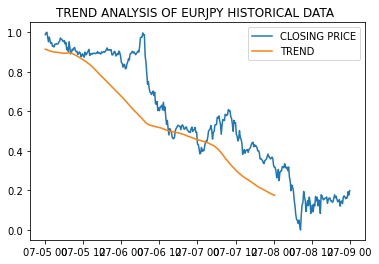

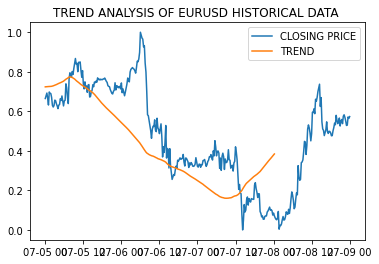

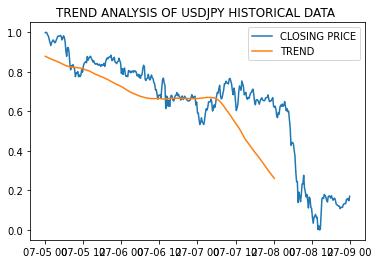

In [58]:
#Estimating trend of EURJPY historical data by observing its nature for a term of 24 hours
movingaverage= ej['Close'].rolling(window=96).mean()
plt.title("TREND ANALYSIS OF EURJPY HISTORICAL DATA ")
plt.plot(ej['Close'],label="CLOSING PRICE")
plt.plot(movingaverage,label="TREND")
plt.legend()
plt.show()

#Estimating trend of EURUSD historical data by observing its nature for a term of 24 hours
movingaverage= eu['Close'].rolling(window=96).mean()
plt.title("TREND ANALYSIS OF EURUSD HISTORICAL DATA ")
plt.plot(eu['Close'],label="CLOSING PRICE")
plt.plot(movingaverage,label="TREND")
plt.legend()
plt.show()

#Estimating trend of USDJPY historical data by observing its nature for a term of 24 hours
movingaverage= uj['Close'].rolling(window=96).mean()
plt.title("TREND ANALYSIS OF USDJPY HISTORICAL DATA ")
plt.plot(uj['Close'],label="CLOSING PRICE")
plt.plot(movingaverage,label="TREND")
plt.legend()
plt.show()

The orange plot shows the trend of the closing value of all three datasets.


1.  The plotting of trend of EURJPY shows the closing value has a upward trend from past years
2.   The plotting of trend of EURUSD shows the closing value has a downward trend initially for short phase and then a continous long up trend.
3. The plotting of trend of USDJPY shows the closing value has a upwards trend from past years. 



### After your analysis, please note that this is a time series data and in real world, your program will only get one data point at a time (in the example it will be 15 mins) so provide pseudo code or details on how your program will analyze the stream of data and how you will constantly update your analysis as new data points become available. 


Solution: In cases where we do not have a historical data and our analysis totally depends upon the continous flow of real time data we genarally implement stream processing techniques. This type of analytics is not concerned about complex calculations rather they are very much concerned of keeping the analysis and visualization up to date. Stream processor perform data ingestion and preprocessing. Apache kafka is a easy solution to this kind of situation.


## How to employ Machine learning to the three given datasets?

Solution: For a time series dataset ARIMA(Auto regressive integrated moving average) is a best forecasting tool. If the given data is seasonal(which is not the case for these three) then we should proceed with sarimax(Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) .

To implement ARIMA in this project:


1.   I have already processed the auto correlation and partial auto correlation 
visualization . Observing from it we can decide our further steps.
2.   As described in the "Thoughts on Autocorrelation and Partial Autocorrelation" part of this project we can compute the p ,d and q value . 
3. This values are much important for the ARIMA model. we will be providing 
order(p,d,q) to the model for training.

*This is what it all needs for a wonderful forcasting of the future data.*

.

the code looks like


```
# This is formatted as code
model=ARIMA(<DataSet name>[<Column name>],order=(p,d,q))
model_fit=model.fit()
model_fit.predict(start=startvalue,end=endvalue,dynamic=Boolean value)
```





